## Exercise 4 - Statistics and tests

First name: Brian
<br>
Last name: Schweigler
<br>
Matriculation number: 16-102-071


##### Q1: Consider the sentence “Ann plays the role with Mary and Annie”. Use RegExp to replace “Ann” by “Alice” and obtain “Alice plays the role with Mary and Annie”.
General imports and solving the question:

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import re
import numpy as np
import lxml.etree
from scipy import stats

s1 = "Ann plays the role with Mary and Annie"
replaced1 = re.sub("Ann ", "Alice ", s1)
print(replaced1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Alice plays the role with Mary and Annie


##### Q2: Consider the sentence “$99.99 to $87.80 or Fr. 75.50”. Use RegExp to remove the decimal part of prices and obtain “$99 to $87 or Fr. 75”.


In [38]:
s2 = "$99.99 to $87.80 or Fr.75.50"
replaced2 = re.sub('(\d+\.)\d*', r'\1', s2)
print(replaced2)

$99. to $87. or Fr.75.


##### Q2: What is the vocabulary size of this novel?

In [3]:
print("Distinct words: ",len(set(words)))

Distinct words:  16873


##### Q3: How many occurrences of “Swiss” do you count in this novel?

In [4]:
swiss = [w for w in words if w == "Swiss"]
# swiss = re.findall('swiss',words)
print("the word Swiss occurs:" ,len(swiss))

the word Swiss occurs: 0


##### Q4: Can you count the number of plays per author?

This was done in exercise 2 (the last series), thus I assume this is a mistake as we only have one author here.

##### Q5: Can you generate a similar view for the word “whale”? (+Q6 "Ahab", and Q7 "upon")

Define a plot and then we can also do question 6 and 7.

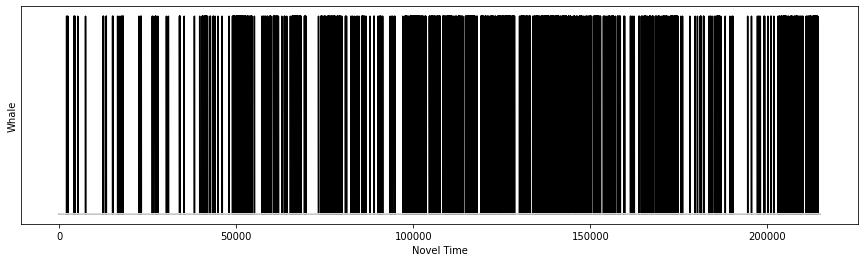

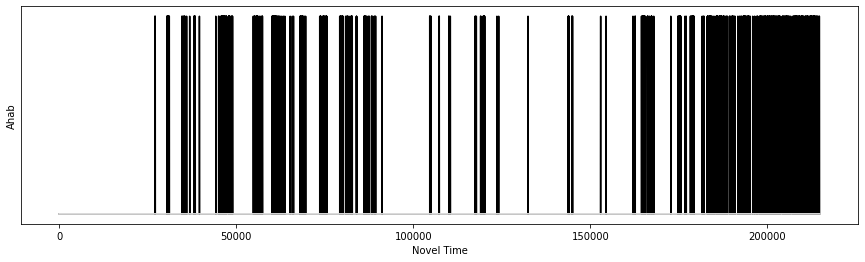

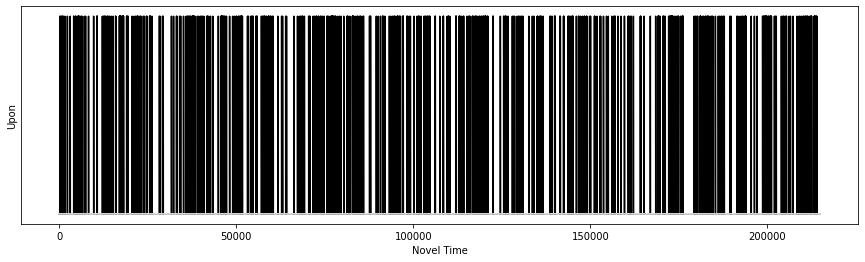

In [5]:
def dispersionPlot(string_to_match: str):
    mask = [ 0.0000001 if w == string_to_match else 0 for w in words]
    fig = plt.figure(figsize=(15, 4))
    plt.plot( mask, color = 'black' )
    plt.ylabel(string_to_match.capitalize())
    plt.xlabel("Novel Time")
    plt.yticks([])
    plt.plot( np.zeros(len(mask)), color = 'white')
    plt.show()

#from the text above the exercise i conclude that we also should match Whale
for word in ['whale','ahab','upon']:
    dispersionPlot(word)

##### Q8: Do you notice any similarities/differences between these three views?

Upon is quite evenly distributed.

Whale appears a lot more frequently in the middle of the book, probably towards the climax (and whale encounters).

Ahab appears almost only towards the end; maybe a change from first-person to third-person in narrating style?

